In [ ]:
#import the necessary python libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pickle

#load dataset
data_url=("https://raw.githubusercontent.com/HamoyeFoundation/DE/main/datasets/regression/winequality-red.csv")
df = pd.read_csv(data_url, delimiter= ";")

#view dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
#explore dataset
df.shape

(1599, 12)

In [13]:
#explore dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [17]:
#checking for missing data
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [25]:
#split the dataset into target and features
y=df["quality"]
#x=df.drop(["quality"], axis=1)
x=df.drop(columns=["quality"])

In [27]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [29]:
#split the features(x) and target(y) dataset into train and test

x_train, x_test, y_train, y_test = train_test_split(x, y,
test_size=0.2, random_state=42)

In [33]:
#normalize the features dataset

scaler=StandardScaler()
scaler=scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [36]:
x_train_scaled

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

In [40]:
#set the hyperparameters

ridge_params={"alpha": [0.001, 0.01, 0.1, 1, 10, 100], "fit_intercept": [True, False], "solver": ["svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]}
lasso_params={"alpha": [0.001, 0.01, 0.1, 1, 10, 100], "fit_intercept": [True, False], "copy_X": [True, False]}

In [46]:
#Tune the hyperparameters for Ridge Regression

ridge=Ridge()
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5)
ridge_cv.fit(x_train_scaled, y_train)

print(f"Best parameters for Ridge: {ridge_cv.best_params_}")

Best parameters for Ridge: {'alpha': 100, 'fit_intercept': True, 'solver': 'svd'}


In [48]:
#train model with best alpha param

ridge_best = Ridge(**ridge_cv.best_params_, random_state=3)
ridge_best=ridge_best.fit(x_train_scaled, y_train)

In [50]:
#Tune the hyperparameters for Lasso Regression

lasso=Lasso()
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5)
lasso_cv.fit(x_train_scaled, y_train)

print(f"Best parameters for Lasso: {lasso_cv.best_params_}")

Best parameters for Lasso: {'alpha': 0.01, 'copy_X': True, 'fit_intercept': True}


In [54]:
#train model with best alpha param

lasso_best = Lasso(**lasso_cv.best_params_, random_state=3)
lasso_best=lasso_best.fit(x_train_scaled, y_train)

In [56]:
#Explore CV results for Ridge Tegression
ridge_scores=cross_val_score(estimator=ridge_best, X=x_train_scaled, y=y_train, cv=5)
ridge_scores

array([0.26882555, 0.302465  , 0.29612674, 0.31953142, 0.4314922 ])

In [58]:
#Explore CV results for Ridge Tegression
ridge_scores.mean()

0.323688182527329

In [60]:
#Explore CV results for Lasso Tegression
lasso_scores=cross_val_score(estimator=lasso_best, X=x_train_scaled, y=y_train, cv=5)
ridge_scores

array([0.26882555, 0.302465  , 0.29612674, 0.31953142, 0.4314922 ])

In [62]:
#Explore CV results for Lasso Tegression
lasso_scores.mean()

0.3233557394698264

In [64]:
#evaluate the regression metrics for the trained model
#compare actual value(y_test) with predicted value(y_pred)

ridge_mse=mean_squared_error(y_test, ridge_best.predict(x_test_scaled))
lasso_mse=mean_squared_error(y_test, lasso_best.predict(x_test_scaled))

print(f"Ridge Regression MSE=> {ridge_mse}")
print(f"lasso Regression MSE=> {lasso_mse}")

Ridge Regression MSE=> 0.3926965490007595
lasso Regression MSE=> 0.39301501591123317


In [66]:
#evaluate the regression metrics for the trained model
#compare actual value(y_test) with predicted value(y_pred)

ridge_r2=r2_score(y_test, ridge_best.predict(x_test_scaled))
lasso_r2=r2_score(y_test, lasso_best.predict(x_test_scaled))

print(f"Ridge Regression r2=> {ridge_r2}")
print(f"lasso Regression r2=> {lasso_r2}")

Ridge Regression r2=> 0.3990925354880114
lasso Regression r2=> 0.39860521482224376


In [78]:
#Evaluate feature importance

def plot_feature_importance(model):
    features = list(df.columns)
    features.remove("quality")
    feature_importance = pd.Series(model.coef_, index=features)
    feature_importance.plot(kind='barh')

    if "ridge" in str(model).lower():
        plt.title("Feature Importance for Ridge Regression")
    elif "lasso" in str(model).lower():
        plt.title("Feature Importance for Lasso Regression")

    plt.show()

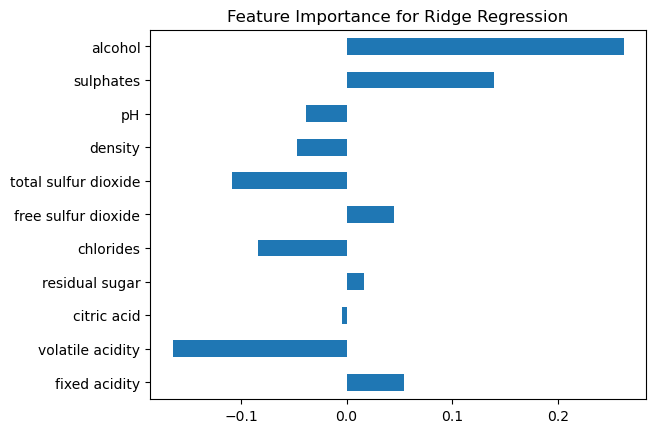

In [80]:
#Evaluate feature importance

plot_feature_importance(model=ridge_best)

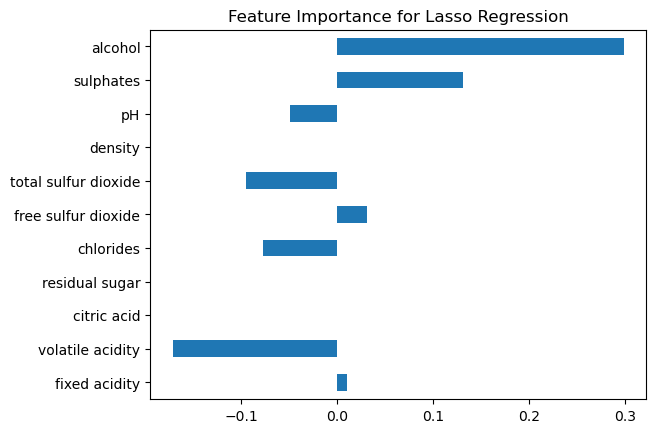

In [82]:
#Evaluate feature importance

plot_feature_importance(model=lasso_best)